In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_train = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.2 数据简单分析
观察图表我们可以知道，共有891行、12列。这代表本训练集共有891条数据，每条数据有12类信息。包括：  
• PassengerId => 乘客ID  
• Survived => 获救情况（1为获救，0为未获救）   
• Pclass => 乘客等级(1/2/3等舱位)  
• Name => 乘客姓名  
• Sex => 性别  
• Age => 年龄  
• SibSp => 堂兄弟/妹个数  
• Parch => 父母与小孩个数  
• Ticket => 船票信息  
• Fare => 票价  
• Cabin => 客舱  
• Embarked => 登船港口  

初步观察，我们会发现一些数据信息值为：nan，这就代表该条数据该类信息缺失。在数据分析中，处理缺失值是一个很重要的步骤。一开始，我们不如统计各类信息的缺失的总体情况，让自己对该数据集有所了解。

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


由此可知，Age（年龄）有714人有记录，Cabin（客舱）有204人有记录，Embarked（登陆港口）有少量缺失。

我们还可以用下列语句进行数据的总体统计：

In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


由此我们可知，乘客的平均年龄为29.7，最大年龄为80.0，最小年龄为0.42。获救人数为总体的0.383838，等等。

5 数据图形化分析  
进行完总体的初步分析，我们接下来进行数据相关性的分析，为了便于观察，我们利用图表展示。  

5.1 乘客各属性

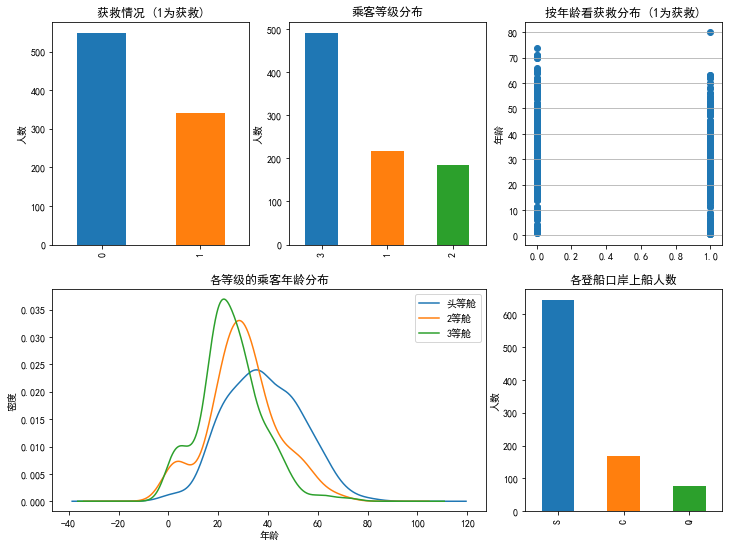

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['font.family']='sans-serif' 
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
fig = plt.figure(figsize=(12, 9))
fig.set(alpha=0.2) # 设定图表颜色alpha参数

plt.subplot2grid((2, 3),(0, 0)) # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# 柱状图
plt.title(u"获救情况 (1为获救)") # 标题
plt.ylabel(u"人数") # Y轴标签

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar") # 柱状图显示
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age) #为散点图传入数据
plt.ylabel(u"年龄") # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y')
plt.title(u"按年龄看获救分布 (1为获救)")

plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde') # 密度图
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")
plt.show()

从这五张图中形象的了解到乘客的信息，获救人数少于未获救人数（之前我们以得到此结论），三等乘客人数最多，获救人员各年龄段分布（第一列第三张图，左边竖列标签为0，右边竖列标签为1），S口岸上船的乘客最多。  

这时，我们就要将乘客各属性与其是否获救联系起来：    
获救情况和乘客等级是否有关？  
获救情况和乘客性别、年龄是否有关？
登船口岸是否是获救因素呢？  

### 5.2 各属性与获救情况的关联  
各乘客等级的获救情况

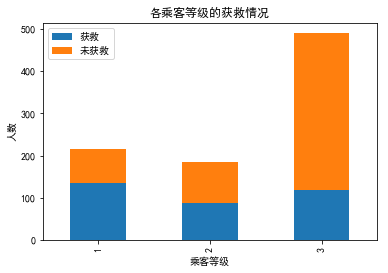

In [7]:
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts() # 未获救
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts() # 获救
df = pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title(u'各乘客等级的获救情况')
plt.xlabel(u'乘客等级')
plt.ylabel(u'人数')
plt.show()

根据图表可以清楚看到第一等级的乘客，获救人数多于未获救人数，而其它两个等级的乘客，获救人数则少于未获救人数。  
所以，乘客等级与获救情况有关联。

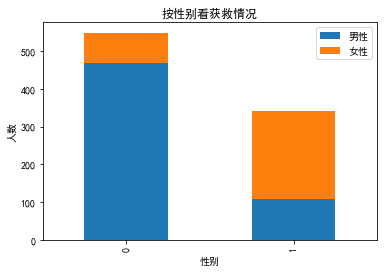

In [8]:
# 各性别的获救情况
Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind = 'bar', stacked = True)
plt.title(u'按性别看获救情况')
plt.xlabel(u'性别')
plt.ylabel(u'人数')
plt.show()

很明显看出，未获救人员中男性乘客比例较大，获救人员中女性乘客比例较大。  
那么，可以确定性别也是获救情况的一个重要因素。

根据舱等级和性别的获救情况（第一、二等级为高级舱，第三等级为低级舱）

d:\python\lib\site-packages\matplotlib\legend.py:493: UserWarning: Unrecognized location "bast". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


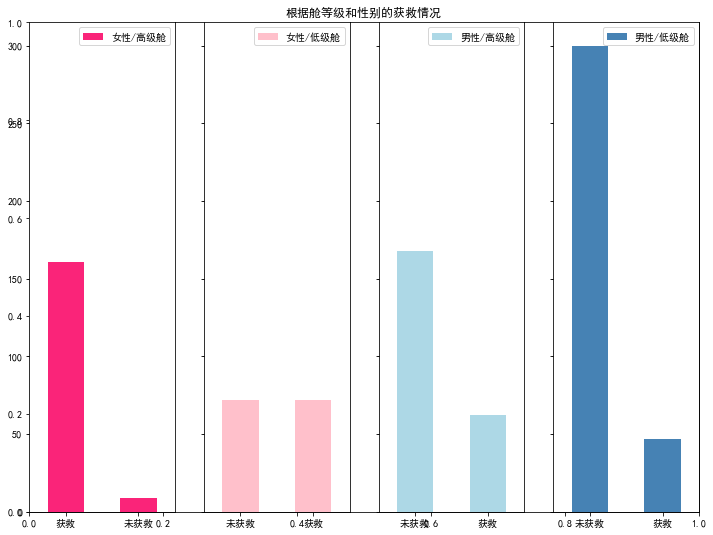

In [10]:
fig = plt.figure(figsize=(12,9))
plt.title(u'根据舱等级和性别的获救情况')

ax1 = fig.add_subplot(141) # 将图像分为1行4列，从左到右从上到下的第1块
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind = 'bar', label = 'female high class', color = '#FA2479')
ax1.set_xticklabels([u'获救', u'未获救'], rotation = 0) # 根据实际填写标签
ax1.legend([u'女性/高级舱'], loc = 'best')

ax2 = fig.add_subplot(142, sharey = ax1) # 将图像分为1行4列，从左到右从上到下的第2块
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind = 'bar', label = 'female low class', color = 'pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3 = fig.add_subplot(143, sharey = ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind = 'bar', label = 'male high class', color = 'lightblue')
ax3.set_xticklabels([u'未获救', u'获救'], rotation = 0)
plt.legend([u'男性/高级舱'], loc = 'best')

ax4 = fig.add_subplot(144, sharey = ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind = 'bar', label = 'male low class', color = 'steelblue')
ax4.set_xticklabels([u'未获救', u'获救'], rotation = 0)
plt.legend([u'男性/低级舱'], loc = 'bast')
plt.show()

很明显高级舱女性的生还率高于低级舱，低级舱男性的死亡率高于高级舱。在四种情况中，高级舱女性的生还率最高，低级舱男性的死亡率最高。  
将与获救情况相关联的两种属性结合后，所得到的结果可以更明显知晓他们的相关性。

<Figure size 432x288 with 0 Axes>

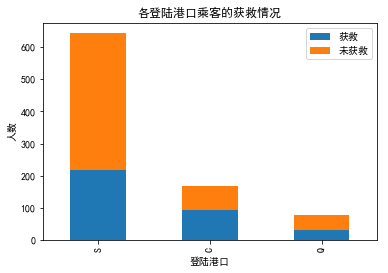

In [11]:
fig = plt.figure()
fig.set(alpha = 0.2)
Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title(u'各登陆港口乘客的获救情况')
plt.xlabel(u'登陆港口')
plt.ylabel(u'人数')
plt.show()

获救情况与上船口岸的联系，根据上图感觉相关性并不强。C港的获救率高一些。  

堂兄弟/妹，孩子/父母有几人，对是否获救的影响

In [12]:
g = data_train.groupby(['SibSp','Survived'])  # 数据分组
df = pd.DataFrame(g.count()['PassengerId'])
print (df)
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


堂兄弟/妹，孩子/父母有几人，对是否获救的影响并不明显。  

按Cabin有无看获救情况

<Figure size 432x288 with 0 Axes>

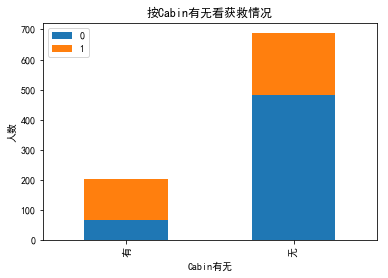

In [13]:
fig = plt.figure()
fig.set(alpha = 0.2)

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df = pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind = 'bar', stacked = True)
plt.title(u'按Cabin有无看获救情况')
plt.xlabel(u'Cabin有无')
plt.ylabel(u'人数')
plt.show()

有客舱信息的获救情况较高一点。但情况复杂，比如生还者上岸后进行信息统计的话，就会影响信息有无对获救情况的关系。

In [16]:
# 简单数据预处理
#我们将测试集导入，再将删除Survived数据的训练集与测验集进行合并，这样便于进行数据处理
data_test = pd.read_csv('./test.csv') # 导入测验集数据

y = data_train['Survived']  # 将训练集Survived 数据存储在y中
del data_train['Survived']  # 删除训练集Survived数据

sum_id = data_test['PassengerId']  # 存储测试集乘客ID

df = pd.merge(data_train, data_test,how='outer')  # 合并无Survived数据的训练集与测验集，how = ‘outer’ 意为并集

#删掉无关因素
df = df.drop(['Name','PassengerId','Ticket','Cabin'], axis=1) # 删除姓名、ID、船票信息、客舱信息，axis=0 删除行，=1 删除列

#缺失数据填充
df['Age'] = df['Age'].fillna(df['Age'].mean())  # 用平均值填充空值
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna( df['Embarked'].value_counts().index[0]) # 用数量最多项填充

#将性别与港口用哑变量表示
dumm = pd.get_dummies(df[['Sex', 'Embarked']]) # '哑变量'矩阵
df = df.join(dumm)
del df['Sex']  # 删除
del df['Embarked']

#数据降维
df['Age'] = (df['Age']-df['Age'].min()) / (df['Age'].max()-df['Age'].min())

df['Fare'] = (df['Fare']-df['Fare'].min()) / (df['Fare'].max()-df['Fare'].min())

#训练模型
data_train = df[:len(data_train)]  # 将合并后的数据分离
data_test = df[len(data_train):]

In [17]:
# 训练并预测
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,y_val = train_test_split(data_train,y,test_size=0.3, random_state=42) # 以7：3（0.3）将训练集与获救结果随机拆分，随机种子为42

from sklearn.linear_model import LogisticRegression  # 引入逻辑回归
LR = LogisticRegression()

LR.fit(X_train, y_train)  # 训练数据
print('训练集准确率：\n', LR.score(X_train, y_train))  # 分数
print('验证集准确率：\n', LR.score(X_val, y_val))

#预测测验集
pred= LR.predict(data_test)  # pred 为预测结果

pred = pd.DataFrame({'PassengerId':sum_id.values, 'Survived':pred})  # 格式化预测结果

pred.to_csv('./pred_LR.csv', index=None)  # 导出数据

训练集准确率：
 0.797752808988764
验证集准确率：
 0.8022388059701493
